In [3]:
from sklearn.feature_extraction import DictVectorizer
from sklearn import tree
from sklearn import preprocessing
import csv
import numpy as np

In [4]:
# 读入数据
Dtree = open(r'AllElectronics.csv', 'r')
reader = csv.reader(Dtree)

# 获取第一行数据
headers = reader.__next__()
print(headers)

# 定义两个列表
featureList = []
labelList = []

for row in reader:
    # 把label存入list
    labelList.append(row[-1])
    rowDict = {}
    for i in range(1, len(row)-1):
        #建立一个数据字典
        rowDict[headers[i]] = row[i]
    # 把数据字典存入list
    featureList.append(rowDict)

print(featureList)

['RID', 'age', 'income', 'student', 'credit_rating', 'class_buys_computer']
[{'age': 'youth', 'income': 'high', 'student': 'no', 'credit_rating': 'fair'}, {'age': 'youth', 'income': 'high', 'student': 'no', 'credit_rating': 'excellent'}, {'age': 'middle_aged', 'income': 'high', 'student': 'no', 'credit_rating': 'fair'}, {'age': 'senior', 'income': 'medium', 'student': 'no', 'credit_rating': 'fair'}, {'age': 'senior', 'income': 'low', 'student': 'yes', 'credit_rating': 'fair'}, {'age': 'senior', 'income': 'low', 'student': 'yes', 'credit_rating': 'excellent'}, {'age': 'middle_aged', 'income': 'low', 'student': 'yes', 'credit_rating': 'excellent'}, {'age': 'youth', 'income': 'medium', 'student': 'no', 'credit_rating': 'fair'}, {'age': 'youth', 'income': 'low', 'student': 'yes', 'credit_rating': 'fair'}, {'age': 'senior', 'income': 'medium', 'student': 'yes', 'credit_rating': 'fair'}, {'age': 'youth', 'income': 'medium', 'student': 'yes', 'credit_rating': 'excellent'}, {'age': 'middle_age

In [5]:
# 把数据转换成01表示
vec = DictVectorizer()
x_data = vec.fit_transform(featureList).toarray()
print("x_data: " + str(x_data))

# 打印属性名称
print(vec.get_feature_names())

# 打印标签
print("labelList: " + str(labelList))

# 把标签转换成01表示
lb = preprocessing.LabelBinarizer()
y_data = lb.fit_transform(labelList)
print("y_data: " + str(y_data))

x_data: [[0. 0. 1. 0. 1. 1. 0. 0. 1. 0.]
 [0. 0. 1. 1. 0. 1. 0. 0. 1. 0.]
 [1. 0. 0. 0. 1. 1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0. 0. 1. 1. 0.]
 [0. 1. 0. 0. 1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0. 1. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0. 0. 1. 0. 1.]
 [0. 0. 1. 1. 0. 0. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 1. 1. 0. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0. 0. 1. 1. 0.]]
['age=middle_aged', 'age=senior', 'age=youth', 'credit_rating=excellent', 'credit_rating=fair', 'income=high', 'income=low', 'income=medium', 'student=no', 'student=yes']
labelList: ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
y_data: [[0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]]


In [6]:
# 创建决策树模型
model = tree.DecisionTreeClassifier(criterion='entropy')  #entropy熵 ID3
# 输入数据建立模型
model.fit(x_data, y_data)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [7]:
# 测试
x_test = x_data[0]
print("x_test: " + str(x_test))

X_test = x_test.reshape(1,-1)
print(X_test)
X_test1 = x_data[0,:,np.newaxis]
print(X_test1)

predict = model.predict(x_test.reshape(1,-1))
print("predict: " + str(predict))

x_test: [0. 0. 1. 0. 1. 1. 0. 0. 1. 0.]
[[0. 0. 1. 0. 1. 1. 0. 0. 1. 0.]]
[[0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]]
predict: [0]


In [12]:
# 导出决策树
# pip install graphviz
# http://www.graphviz.org/
import graphviz 

dot_data = tree.export_graphviz(model, 
                                out_file = None, 
                                feature_names = vec.get_feature_names(),
                                class_names = lb.classes_,
                                filled = True,
                                rounded = True,
                                special_characters = True)
graph = graphviz.Source(dot_data)
graph.render('computer')

SyntaxError: invalid character in identifier (<ipython-input-12-a6b71c91e9e2>, line 9)

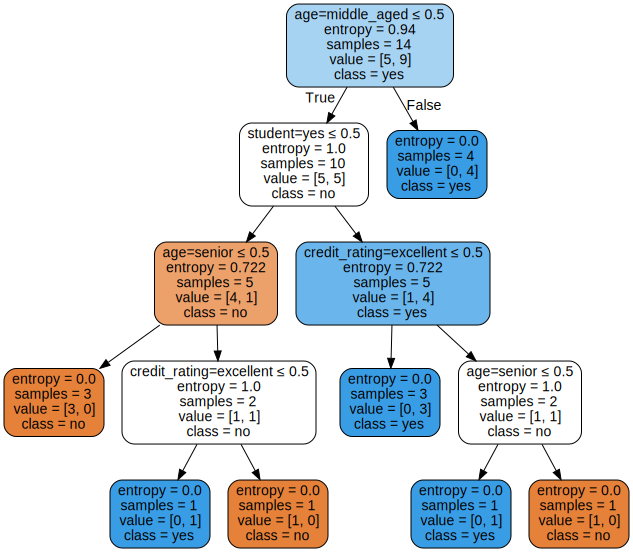

In [14]:
graph

In [10]:
vec.get_feature_names()

['age=middle_aged',
 'age=senior',
 'age=youth',
 'credit_rating=excellent',
 'credit_rating=fair',
 'income=high',
 'income=low',
 'income=medium',
 'student=no',
 'student=yes']

In [11]:
lb.classes_

array(['no', 'yes'], dtype='<U3')